Figures for Section 1.3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read dat file
def reaDat(filename):
    # read dat to a list of lists
    data = [i.strip().split() for i in open("../../data/"+filename).readlines()]
    data_df = pd.DataFrame(data)
    
    # change datatype from str to int
    data_df = data_df.astype({0:'float'})

    return data_df

In [3]:
# time series plot
def plotDat(ts, xlim):
    fig, ax = plt.subplots()
    ax.plot(xlim,ts,'o-')

Figure 1.7

Annual water levels of Lake Huron (left panel) and the residual plot obtained from fitting a
linear trend to the data (right panel).

In [4]:
lake = reaDat("lake.dat")

In [5]:
#find line of best fit
x = range(1,len(lake)+1)
x_1875 = range(1875,1973)
a, b = np.polyfit(x, lake, 1)
fitted = np.polyval([a,b],x)

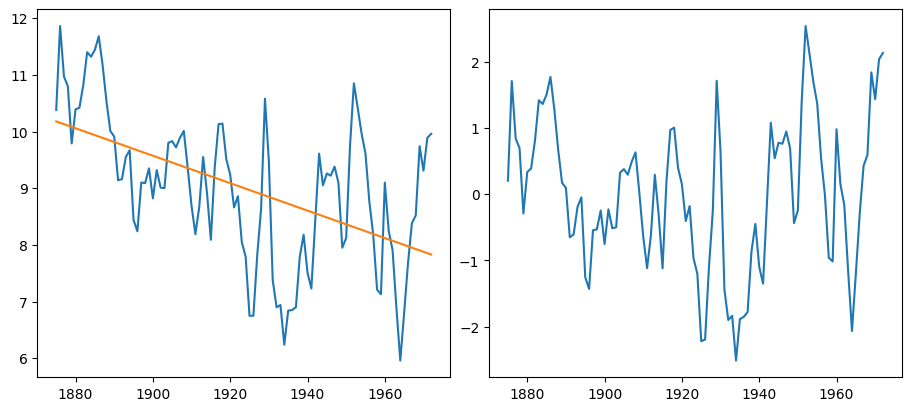

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9,4),constrained_layout = True)
axs[0].plot(x_1875,lake)
axs[0].plot(x_1875,a*x+b)

axs[1].plot(x_1875,lake[0]-fitted)

Figure 1.8

The two-sided moving average filters $W_t$ for the Lake Huron data (upper panel) and their
residuals (lower panel) with bandwidth $q = 2$ (left), $q = 10$ (middle) and $q = 35$ (right).

In [25]:
# create moving windows
def MA(data,q):
    # create an empty array
    l = len(data)
    ma = np.zeros(len(data))

    # initialize the previous and 
    # latter q entries with NaNs
    ma[0:q] = np.nan
    ma[l-q:l] = np.nan
    for i in range(q,l-q):
        # calcualte the mean values between 
        # the previous q and latter q entries
        ma[i] = data[i-q:i+q+1].mean()

    # calcualte the fitted
    x_range = range(l-2*q)
    data_fit = data[q:l-q]
    a,b = np.polyfit(x_range, data_fit,1)
    fitted = np.polyval([a,b],x_range)

    return (ma, fitted, data_fit)

In [29]:
ma2, fit2, d_fit2 = MA(lake[0],2)
ma10, fit10, d_fit10 = MA(lake[0],10)
ma35, fit35, d_fit35 = MA(lake[0], 35)

# reset the x_ticks for residuals
range_fit2 = range(1875+2,1973-2)
range_fit10 = range(1875+10,1973-10)
range_fit35 = range(1875+35,1973-35)

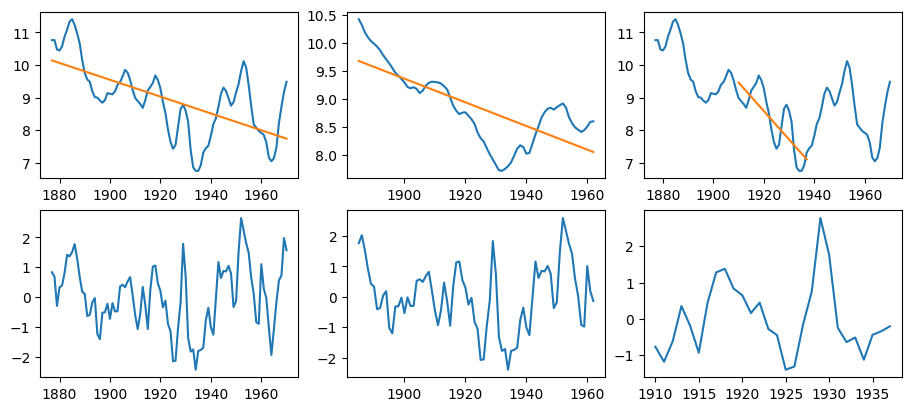

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(9,4),constrained_layout = True)
axs[0,0].plot(x_1875,ma2, label='Moving Average (window=2)')
axs[0,0].plot(range_fit2,fit2)

axs[0,1].plot(x_1875,ma10, label='Moving Average (window=10)')
axs[0,1].plot(range_fit10,fit10)

axs[0,2].plot(x_1875,ma2, label='Moving Average (window=35)')
axs[0,2].plot(range_fit35,fit35)

axs[1,0].plot(range_fit2, d_fit2-fit2)
axs[1,1].plot(range_fit10, d_fit10-fit10)
axs[1,2].plot(range_fit35, d_fit35-fit35)

Figure 1.9

Time series plots of the observed sequences ($\nabla x_t$) in the left panel and ($\nabla^2 x_t$) in the right
panel of the differenced Lake Huron data described in Example 1.3.1.

In [10]:
df1 = np.diff(lake[0])
df2 = np.diff(df1)

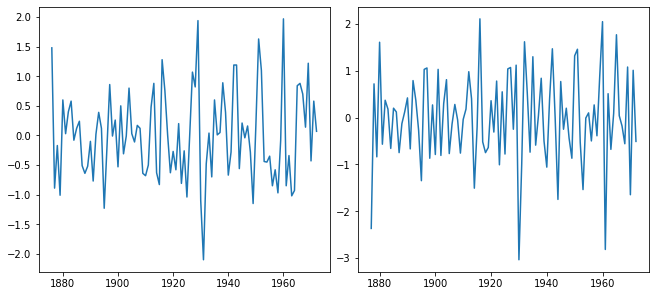

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(9,4),constrained_layout = True)
axs[0].plot(range(1876,1973),df1)
# plt.show()
axs[1].plot(range(1877,1973),df2)